# **Car Price Prediction with Machine Learning**

# **Importing Required Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
!pip install catboost
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")
sns.set(style="darkgrid", font_scale=1.5)
pd.set_option("display.max.columns", None)
pd.set_option("display.max.rows", None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Loading the Dataset**

In [3]:
path = '/content/drive/MyDrive/Dataset/CarPrice_Assignment.csv'

In [4]:
df = pd.read_csv(path)

## Understanding the Data

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (205, 26)


In [8]:
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null  

In [9]:
print("\nDescription of the data:")
print(df.describe())


Description of the data:
           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.6802

In [10]:
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [11]:
print("\nDuplicated records:", df.duplicated().sum())


Duplicated records: 0


In [12]:
print("\nData types of columns:")
print(df.dtypes)


Data types of columns:
car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


# **Data Cleaning**

## Extracting company name from CarName

In [13]:
df['CompanyName'] = df['CarName'].apply(lambda x: x.split(" ")[0])
df.drop(columns=["CarName"], inplace=True)

## Fixing typos in company names

In [14]:
replace_dict = {
    'maxda': 'mazda', 'porcshce': 'porsche', 'toyouta': 'toyota',
    'vokswagen': 'volkswagen', 'vw': 'volkswagen'
}

In [15]:
df['CompanyName'].replace(replace_dict, inplace=True)

# **Exploratory Data Analysis (EDA)**

## Correlation Heatmap for numerical features

In [16]:
numerical_features = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
                      'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
                      'peakrpm', 'citympg', 'highwaympg', 'price']

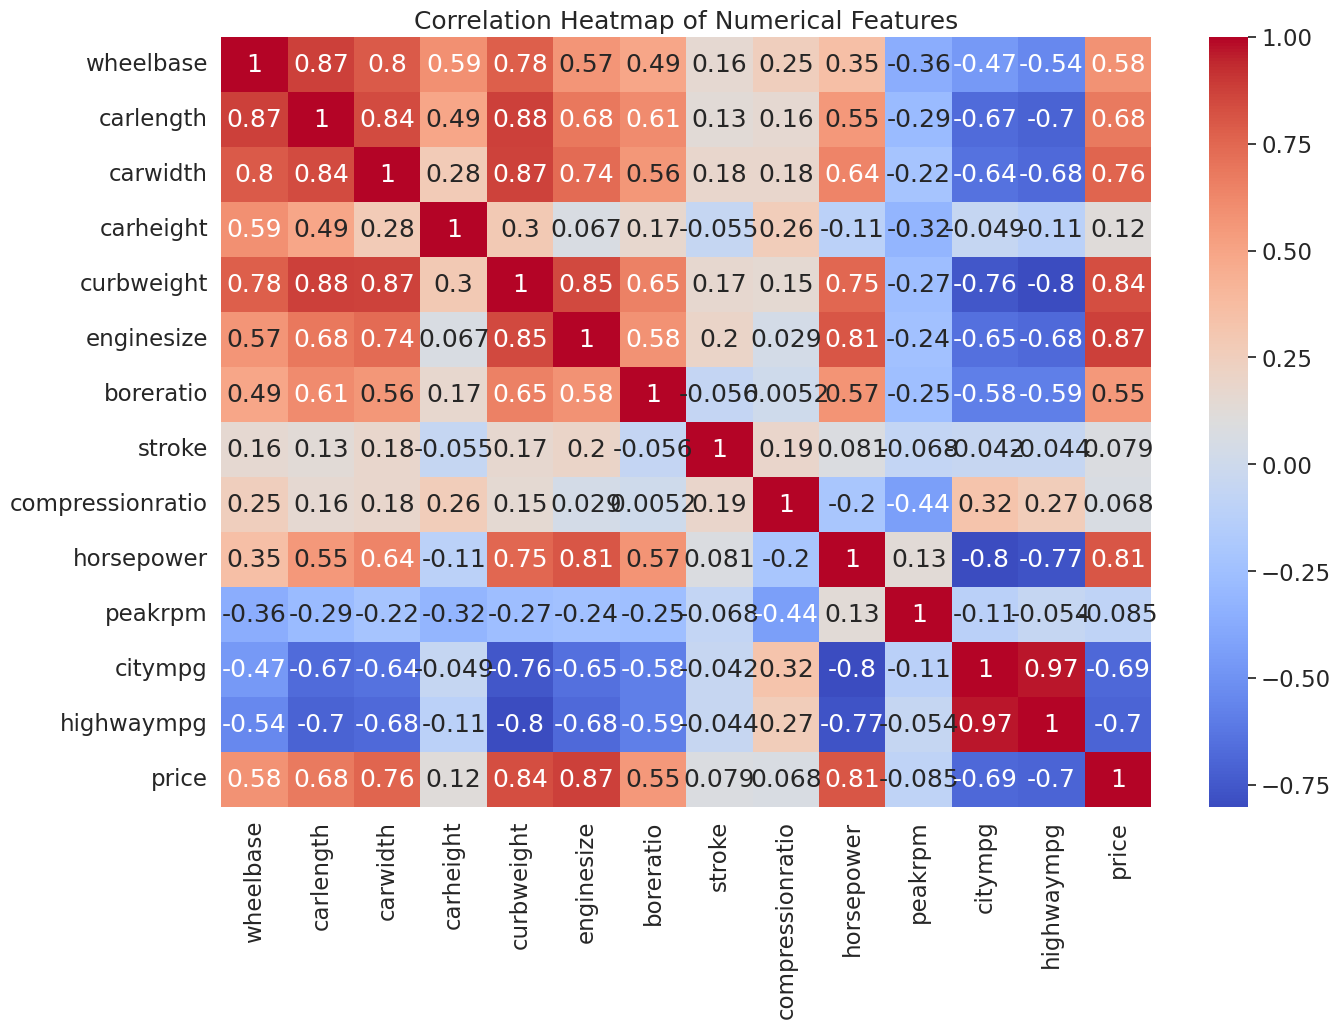

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

## Bar plot: Total cars produced by companies

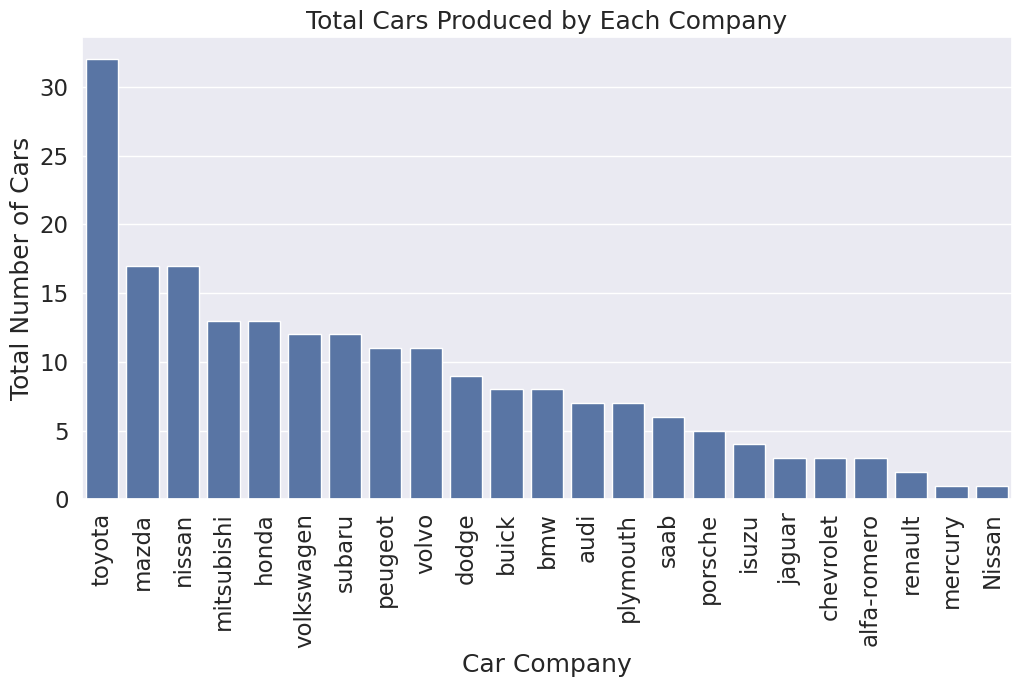

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['CompanyName'].value_counts().index, y=df['CompanyName'].value_counts().values)
plt.xlabel("Car Company")
plt.ylabel("Total Number of Cars")
plt.title("Total Cars Produced by Each Company")
plt.xticks(rotation=90)
plt.show()

## Price distribution plot

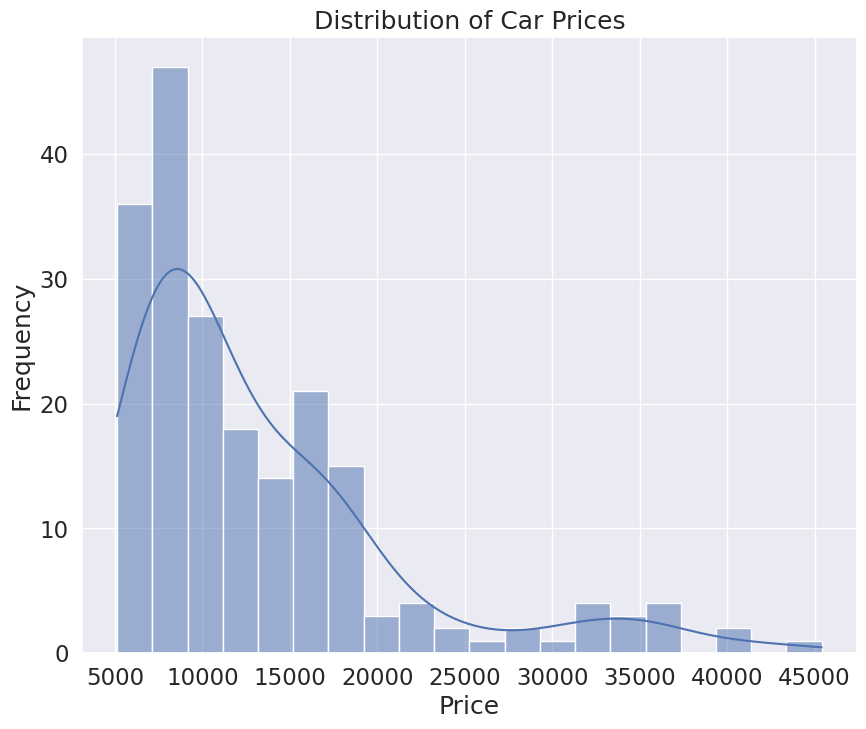

In [22]:
plt.figure(figsize=(10, 8))
sns.histplot(data=df['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Scatter plots for car dimensions and price

In [23]:
def scatter_plot(features, title_prefix="Feature"):
    plt.figure(figsize=(15, 6))
    for i, col in enumerate(features, 1):
        plt.subplot(1, len(features), i)
        sns.scatterplot(x=col, y='price', data=df)
        plt.title(f'{col} vs Price')
    plt.tight_layout()
    plt.show()


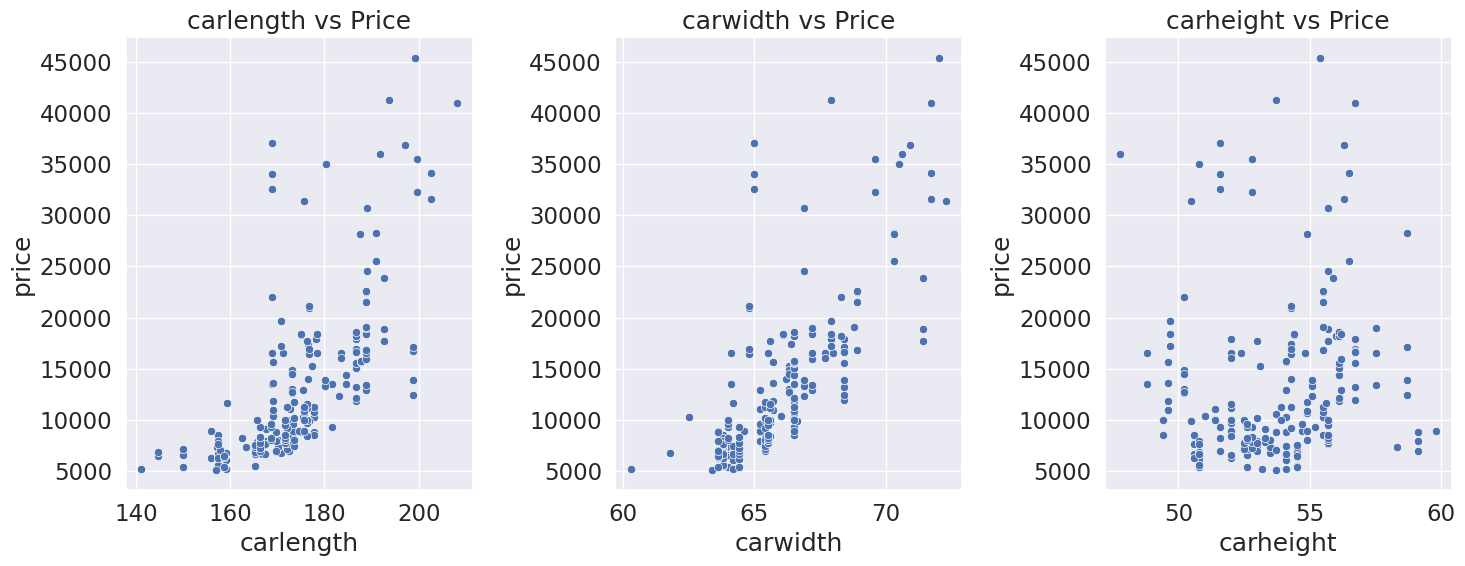

In [24]:
scatter_plot(['carlength', 'carwidth', 'carheight'], 'Car Dimensions')

## Creating price ranges

In [25]:
price_bins = [0, 10000, 20000, 40000]
price_labels = ['Budget', 'Medium', 'Highend']
df['PriceRange'] = pd.cut(df['price'], bins=price_bins, labels=price_labels)

# **Data Preprocessing**

## Selecting relevant features

In [26]:
selected_features = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                     'enginetype', 'cylindernumber', 'fuelsystem', 'wheelbase', 'carlength',
                     'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
                     'citympg', 'highwaympg', 'price', 'PriceRange']

In [27]:
df_model = df[selected_features]

## One-hot encoding categorical variables

In [28]:
df_model = pd.get_dummies(df_model, columns=['fueltype', 'aspiration', 'doornumber', 'carbody',
                                             'drivewheel', 'enginetype', 'cylindernumber',
                                             'fuelsystem', 'PriceRange'])

## Scaling numerical features

In [29]:
scaler = StandardScaler()
numerical_columns = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
                     'boreratio', 'horsepower', 'citympg', 'highwaympg']
df_model[numerical_columns] = scaler.fit_transform(df_model[numerical_columns])

# **Splitting data into train and test sets**

In [30]:
X = df_model.drop(columns=['price'])
y = df_model['price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Training and Evaluation**

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'CatBoost': CatBoostRegressor(verbose=False),
    'LGBM': LGBMRegressor()
}

In [33]:
training_scores = []
testing_scores = []

In [34]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_score = r2_score(y_train, y_train_pred) * 100
    test_score = r2_score(y_test, y_test_pred) * 100

    training_scores.append(train_score)
    testing_scores.append(test_score)

    print(f"{model_name}: Training R2 Score: {train_score:.2f}% | Testing R2 Score: {test_score:.2f}%")


Linear Regression: Training R2 Score: 96.53% | Testing R2 Score: 93.96%
Decision Tree: Training R2 Score: 99.88% | Testing R2 Score: 88.51%
Random Forest: Training R2 Score: 98.26% | Testing R2 Score: 92.20%
AdaBoost: Training R2 Score: 96.75% | Testing R2 Score: 92.32%
Gradient Boosting: Training R2 Score: 99.35% | Testing R2 Score: 92.90%
XGBoost: Training R2 Score: 99.88% | Testing R2 Score: 93.57%
CatBoost: Training R2 Score: 99.74% | Testing R2 Score: 93.29%
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 304
[LightGBM] [Info] Number of data points in the train set: 164, number of used features: 24
[LightGBM] [Info] Start training from score 13223.414634
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

# **Model Performance Comparison**

In [35]:
performance_df = pd.DataFrame({
    'Model': models.keys(),
    'Training Score': training_scores,
    'Testing Score': testing_scores
})


In [37]:
performance_df

,Model,Training Score,Testing Score
0,Linear Regression,96.534425,93.963421
1,Decision Tree,99.881027,88.506015
2,Random Forest,98.255492,92.201919
3,AdaBoost,96.749497,92.323625
4,Gradient Boosting,99.354889,92.901989
5,XGBoost,99.880934,93.567496
6,CatBoost,99.735755,93.285189
7,LGBM,96.986171,89.133203


## Bar plot for model comparison

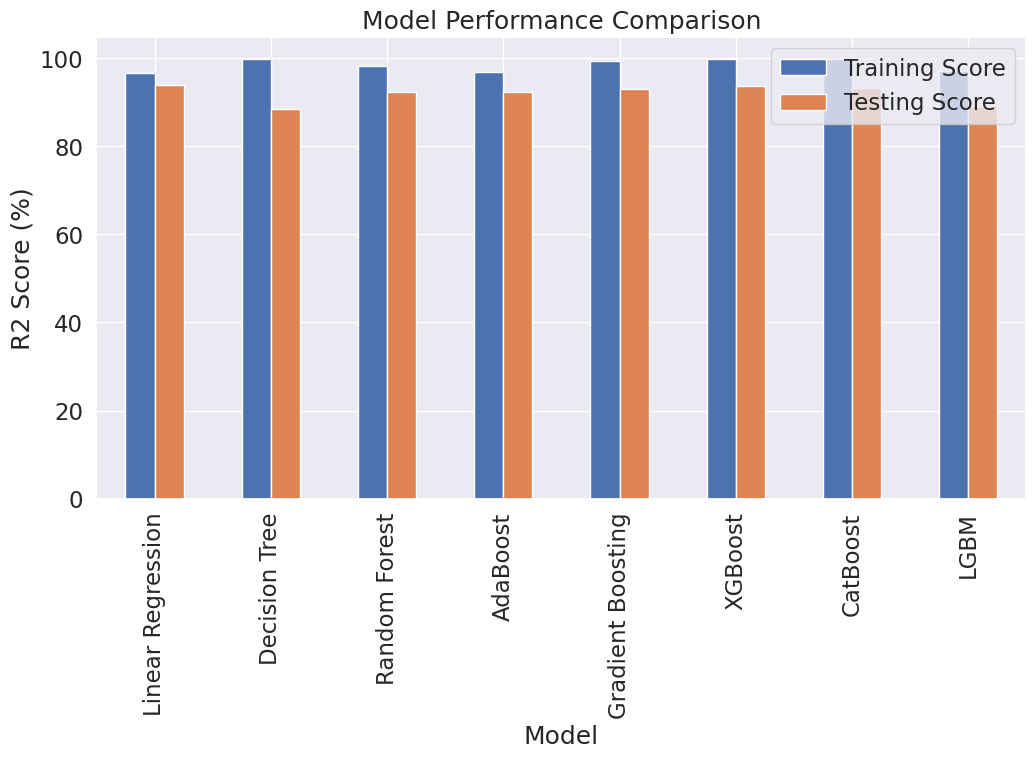

In [38]:
performance_df.plot(x='Model', y=['Training Score', 'Testing Score'], kind='bar', figsize=(12, 6), title='Model Performance Comparison')
plt.ylabel('R2 Score (%)')
plt.show()